Hi! I am Manjari. This is my assignment for W3Dev Internship.
I have already mounted drive and unzipped the dataset from kaggle.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Unzipping dataset in following code box



In [ ]:
!unzip '/content/drive/MyDrive/Internship/archive (2).zip'

Now we'll import libraries and get started

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Readind csv(s)

In [ ]:
df= pd.read_csv('/content/googleplaystore.csv')
data= pd.read_csv('/content/googleplaystore_user_reviews.csv')

Let's see how our dataset look for both dataframes

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


let's see their shape, i.e., how many rows and columns they have

In [ ]:
df.shape

(10841, 13)

In [ ]:
data.shape

(64295, 5)

I've first started working with df dataframe. I'll start by first dropping duplicate values (rows) from it

In [ ]:
df1= df.drop_duplicates()

In [ ]:
#it's shape after removing all duplicate values
df1.shape

(10358, 13)

Now, let's drop all the unnecessary columns which won't affect Rating

In [ ]:
df1= df1.drop(['Category', 'Type', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)
df1.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",0,Everyone
1,Coloring book moana,3.9,967,14M,"500,000+",0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",0,Everyone
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",0,Teen
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",0,Everyone


In Reviews column our entries are in string format. I'll convert them to numeric form

In [ ]:
# Convert column values to float with error handling
def convert_to_float(value):
    try:
        return float(value)
    except ValueError: #this is to handle exceptions and empty values
        return None

df1['Reviews'] = df1['Reviews'].apply(convert_to_float)

Let's see if there are any empty values in Reviews column

In [ ]:
df1['Reviews'].isna().sum()

1

There is only one, so we'll drop it.

In [ ]:
df1.dropna(subset=['Reviews'], inplace=True)

Now, we'll move to Size column and see what kind of values it has

In [ ]:
df1.groupby('Size')['Size'].agg('count')

Size
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
1.4M                    37
                      ... 
98M                     15
992k                     1
994k                     1
99M                     38
Varies with device    1526
Name: Size, Length: 461, dtype: int64

We'll convert these values to float form. The sizes are given in MB and KB. Also many rows don't have their sizes defined

In [ ]:
import re
def convert_size(size):
    if size == 'Varies with device':
        return None

    if size== None:
      return None

    # Extract numeric value and unit from the size string
    value, unit = re.match(r'^(\d+\.?\d*)([Mk])?$', size).groups()

    # Convert value to float based on unit
    if unit == 'M': #for MB
        return float(value)
    elif unit == 'k': #for kb
        return float(value) / 1024

    return None

# Apply the conversion function to the 'Size' column
df1['Size'] = df1['Size'].apply(convert_size)

Now we'll see how size changed after applying the above function

In [ ]:
df1.groupby('Size')['Size'].agg('count')

Size
0.008301       1
0.010742       1
0.013672       1
0.016602       2
0.017578       2
              ..
96.000000     25
97.000000     19
98.000000     15
99.000000     38
100.000000    16
Name: Size, Length: 459, dtype: int64

These values will do. Now, let's see if there are any empty values in this column

In [ ]:
df1['Size'].isna().sum()

1526

In [ ]:
df2= df1.copy()

I'll keep copying dataframe into new dataframe if there are major changes so as to keep track here

In df2 I'm filling empty values with the mean of other values

In [ ]:
df2['Size'].fillna(df2['Size'].mean(), inplace=True) #filling sizes with mean of all other sizes

Now, let's move on to other column 'Installs' and see what kind of values this one has

In [ ]:
df2.groupby('Installs')['Installs'].agg('count')

Installs
0                    1
0+                  14
1+                  67
1,000+             890
1,000,000+        1488
1,000,000,000+      49
10+                385
10,000+           1033
10,000,000+       1132
100+               710
100,000+          1129
100,000,000+       369
5+                  82
5,000+             469
5,000,000+         683
50+                204
50,000+            474
50,000,000+        272
500+               328
500,000+           517
500,000,000+        61
Name: Installs, dtype: int64

Let's change these to numeric values too

In [ ]:
df3= df2.copy()

Here, I'm going to convert these values to integer after stripping them of ',' and '+'

In [ ]:
def convert_to_integer(value):
    value = value.replace(',', '')  # Remove commas
    value = value.rstrip('+')  # Remove '+'
    return int(value)

# Apply the conversion function to the 'Values' column
df3['Installs'] = df3['Installs'].apply(convert_to_integer)

Let's see the changes

In [ ]:
df3.groupby('Installs')['Installs'].agg('count')

Installs
0               15
1               67
5               82
10             385
50             204
100            710
500            328
1000           890
5000           469
10000         1033
50000          474
100000        1129
500000         517
1000000       1488
5000000        683
10000000      1132
50000000       272
100000000      369
500000000       61
1000000000      49
Name: Installs, dtype: int64

Perfect!

In [ ]:
df4= df3.copy()

Now, let's move on to 'Price' column

In [ ]:
df4.groupby('Price')['Price'].agg('count')

Price
$0.99      146
$1.00        3
$1.04        1
$1.20        1
$1.26        1
          ... 
$8.99        5
$89.99       1
$9.00        1
$9.99       19
0         9592
Name: Price, Length: 92, dtype: int64

It has 92 different values and they are in string format. Let's convert them to float

In [ ]:
def convert_to_float(value):
    value = value.lstrip('$')  # Remove the dollar sign
    return float(value)

# Apply the conversion function to the 'Price' column
df4['Price'] = df4['Price'].apply(convert_to_float)

Let's see the changes

In [ ]:
df4.groupby('Price')['Price'].agg('count')

Price
0.00      9592
0.99       146
1.00         3
1.04         1
1.20         1
          ... 
379.99       1
389.99       1
394.99       1
399.99      12
400.00       1
Name: Price, Length: 92, dtype: int64

We'll check if there are any empty values to deal with in this column

In [ ]:
df4['Price'].isna().sum()

0

There aren't any.

In [ ]:
df5= df4.copy()

Moving on to next column 'Content Rating'

In [ ]:
df5.groupby('Content Rating')['Content Rating'].agg('count')

Content Rating
Adults only 18+       3
Everyone           8382
Everyone 10+        377
Mature 17+          447
Teen               1146
Unrated               2
Name: Content Rating, dtype: int64

I'm going to map these values to integer. I'll assume Adults only 18+ and Mature 17+ in same category, Teen and Everyone 10+ as same, then we'll have category for Everyone and Others

In [ ]:
#Adults:0 , Everyone:1, Teen:2, Others:3 these are the mappings
rating_mapping = {'Adults only 18+': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Mature 17+': 0, 'Teen': 2, 'Unrated': 3}
# Map the content rating values to numeric classes
df5['Content Rating'] = df5['Content Rating'].map(rating_mapping)

Let's again check for empty values

In [ ]:
df5['Content Rating'].isna().sum()

0

Cool... Now, we'll drop duplicates to maintain uniformity

In [ ]:
df6= df5.drop_duplicates()

I have noticed many rows in this dataset are same except for their values of column 'Reviews'. I'll drop those extra rows by keeping the row with highest value of 'Reviews'

In [ ]:
#here sorting rows by descending order of reviews
df_sorted = df6.sort_values('Reviews', ascending=False)

Now Dropping duplicated rows

In [ ]:
# Drop duplicated rows based on specific columns and keep the row with the highest value in the 'Reviews' column
df7 = df_sorted.drop_duplicates(subset=['App', 'Rating', 'Size', 'Installs', 'Price', 'Content Rating'], keep='first')

Let's see the shape of our dataset

In [ ]:
df7.shape

(9682, 7)

Let's see how it looks now

In [ ]:
df7.head()

,App,Rating,Reviews,Size,Installs,Price,Content Rating
2544,Facebook,4.1,78158306.0,21.287413,1000000000,0.0,2
336,WhatsApp Messenger,4.4,69119316.0,21.287413,1000000000,0.0,1
2604,Instagram,4.5,66577446.0,21.287413,1000000000,0.0,2
382,Messenger – Text and Video Chat for Free,4.0,56646578.0,21.287413,1000000000,0.0,1
1879,Clash of Clans,4.6,44893888.0,98.000000,100000000,0.0,2


We have cleaned our first dataframe
Now we'll move to our second dataset containg user reviews

In [ ]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Copying data

In [ ]:
data1= data.copy()

I'm going create dummies for sentiment column

In [ ]:
# Create dummy columns for 'Sentiment'
dummies = pd.get_dummies(data1['Sentiment'])

# Concatenate the dummy columns with the original DataFrame
data1 = pd.concat([data1, dummies], axis=1)

Let's see how it looks now

In [ ]:
data1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Neutral,Positive
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0,0,1
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0,0,1
2,10 Best Foods for You,NaN,NaN,NaN,NaN,0,0,0
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0,0,1
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0,0,1


Let's drop Sentiment column since it's no longer of use

In [ ]:
data2= data1.drop(['Sentiment'], axis=1)

Let's drop all the rows having empty values for 'Translated_Review', since if this column is empty the corresponding value of other columns will also be empty

In [ ]:
data2.dropna(subset=['Translated_Review'],inplace=True)

Now dropping columns 'Translated_Review' and 'Neutral'

In [ ]:
data3= data2.drop(['Translated_Review', 'Neutral'], axis=1)

Let's see how our dataset looks now

In [ ]:
data3.head()

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Positive
0,10 Best Foods for You,1.00,0.533333,0,1
1,10 Best Foods for You,0.25,0.288462,0,1
3,10 Best Foods for You,0.40,0.875000,0,1
4,10 Best Foods for You,1.00,0.300000,0,1
5,10 Best Foods for You,1.00,0.300000,0,1


I want to see how the columns are related to each other and if there is too high relation (like above 90%), then I'll drop those extra columns

I'll use Pearson Correlation Map

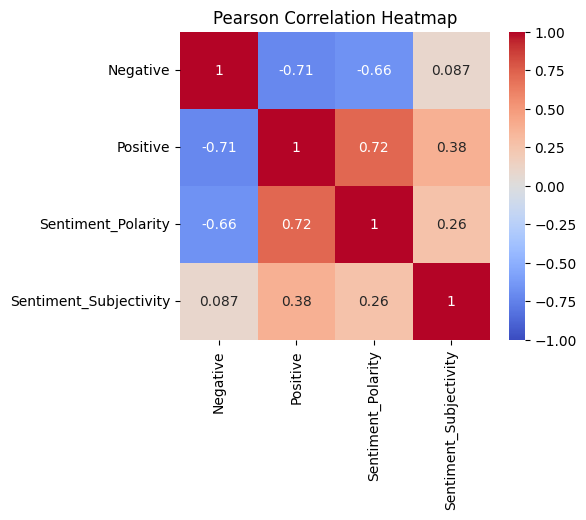

In [ ]:
# Select the columns of interest
columns = ['Negative', 'Positive', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
df_selected = data3[columns]

# Calculate the Pearson correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

Sorry, the maximum correlation is between 'Sentiment_Subjectivity' and 'Negative' column (about 87%). So, let's keep all columns

In [ ]:
merged_data = data3.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Negative': 'sum',
    'Positive': 'sum'
}).reset_index()


In the above code box I have merged all rows having same App name by adding the values of 'Positive' and 'Negative' column, and taking the mean of 'Sentiment_Polarity' and 'Sentiment_Subjectivity' column

Let's see how our merged dataset looks

In [ ]:
merged_data.head()

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Positive
0,10 Best Foods for You,0.470733,0.495455,10,162
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516,1,31
2,11st,0.185943,0.455340,7,23
3,1800 Contacts - Lens Store,0.318145,0.591098,6,64
4,1LINE – One Line with One Touch,0.196290,0.557315,8,27


Let's see its shape

In [ ]:
merged_data.shape

(865, 5)

Now we'll join the previous dataset df7 with merged_data by the App name and using inner join, i.e, it will only contain information of apps that are present in both dataframes

In [ ]:
dataset = pd.merge(merged_data, df7, on='App', how='inner')

Let's see how it looks

In [ ]:
dataset.head(5)

,App,Sentiment_Polarity,Sentiment_Subjectivity,Negative,Positive,Rating,Reviews,Size,Installs,Price,Content Rating
0,10 Best Foods for You,0.470733,0.495455,10,162,4.0,2490.0,3.800000,500000,0.0,2
1,11st,0.185943,0.455340,7,23,3.8,48732.0,20.000000,10000000,0.0,1
2,1800 Contacts - Lens Store,0.318145,0.591098,6,64,4.7,23160.0,26.000000,1000000,0.0,1
3,1LINE – One Line with One Touch,0.196290,0.557315,8,27,4.6,214878.0,10.000000,10000000,0.0,1
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,0.449566,0.520573,1,25,4.2,115773.0,21.287413,10000000,0.0,1


Once again let's use Pearson Map to find correlation between columns of 'dataset'

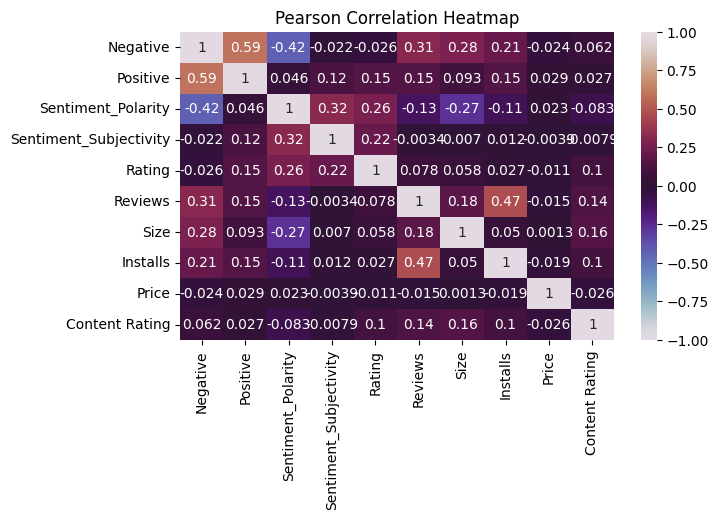

In [ ]:
# Select the columns of interest
columns = ['Negative', 'Positive', 'Sentiment_Polarity', 'Sentiment_Subjectivity', 'Rating', 'Reviews',	'Size',	'Installs',	'Price', 'Content Rating']
df_selected = dataset[columns]

# Calculate the Pearson correlation matrix
corr_matrix = df_selected.corr()

# Plot the correlation heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr_matrix, annot=True, cmap='twilight', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')
plt.show()

Let's drop the rows with empty values of 'Rating' column

In [ ]:
dataset.dropna(subset=['Rating'], inplace=True)

Since column 'App' is not of use for predicting Rating. Let's drop it too

In [ ]:
new_dataset= dataset.drop(['App'], axis=1)

Now, I'm splitting our data into feature columns and target column

In [ ]:
y= new_dataset['Rating'] #target column
X= new_dataset.drop(['Rating'],axis=1) #Feature Column

Now let's split our data into training and testing. Here test size is of 25%

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=5)

I'll use three models here: Linear Regression, Decision Tree, Gradient Boosting Regressor. Using GridSearch we'll see which mode performs best for our data and with what parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Define the models and their respective parameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regression': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    'Gradient Boosting Regression': (GradientBoostingRegressor(), {'learning_rate': [0.1, 0.01, 0.001]})
}

# Perform GridSearchCV for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search= grid_search.fit(X_train, y_train)  # X: input features, y: target variable

    # Print the best hyperparameters and score for each model
    print(f"Model: {model_name}")
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)  # Negate the score for mean squared error
    print()

Model: Linear Regression
Best Hyperparameters: {}
Best Score: -0.08643277640721335

Model: Decision Tree Regression
Best Hyperparameters: {'max_depth': 5}
Best Score: -0.11122202577225071

Model: Gradient Boosting Regression
Best Hyperparameters: {'learning_rate': 0.01}
Best Score: -0.07799350252732798



Gradient Boosting Regressor performed best for our data with learning parameter 0.01... And the negative mean squared error here is closest to 0

So, we'll use Gradient Boosting Regressor

In [ ]:
# Create an instance of the Gradient Boosting Regression model
GB = GradientBoostingRegressor(learning_rate=0.01)

# Fit the model to the training data
GB.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = GB.predict(X_test)

Let's see what are the predicted values for test features

In [ ]:
print(y_pred)

[4.29992924 4.34489957 4.21685471 4.35996684 4.21685471 4.37778232
 4.19775113 4.1864807  4.2310988  4.26705254 4.34445631 4.34833778
 4.23664659 4.38600306 4.34543708 4.35610556 4.34259956 4.35574145
 4.29414998 4.3126166  4.35200831 4.30177832 4.31420113 4.37778232
 4.13697382 4.3500718  4.34378755 4.3161219  4.33409813 4.13697382
 4.3508203  4.24330793 4.23082134 4.3163162  4.33788605 4.31780685
 4.12171495 4.30980659 4.27909331 4.19426509 4.32291136 4.32652226
 4.06164913 4.323074   3.95866611 4.31058488 4.37778232 3.95866611
 4.3612629  4.34543708 4.19426509 4.29409786 4.36145896 4.36334648
 4.37711356 4.23664659 4.27661079 4.36039789 4.3064187  4.06925363
 4.23951075 4.36494078 4.34259956 4.35633438 4.32918739 4.24483083
 4.25799134 4.3625767  4.33558746 4.34259956 4.19426509 4.20708386
 4.13697382 4.30380493 4.19183319 4.34833778 4.29844542 4.33788605
 4.20024778 4.37077022 4.26899261 4.36948364 4.17308645 4.1864807
 4.37778232 4.29476662 4.20870093 4.19537307 4.3354502  4.35556

Thank You! I hope I this was clear enough for you guys to understand